<a href="https://colab.research.google.com/github/eueu29/AIFFEL_quest/blob/main/Keras/keras_chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 코랩에서 메모리 부족을 피하기 위해 부동소수점 정밀도를 낮춥니다.
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

## 영화 리뷰 분류: 이진 분류 예제

### IMDB 데이터셋

**IMDB 데이터셋 로드하기**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


### 데이터 준비

**정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### 신경망 모델 만들기

**모델 훈련하기**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 39s 1s/step - loss: 0.5195 - accuracy: 0.7861 - val_loss: 0.4067 - val_accuracy: 0.8418
Epoch 2/20
30/30 [==============================] - 37s 1s/step - loss: 0.3208 - accuracy: 0.8950 - val_loss: 0.3042 - val_accuracy: 0.8862
Epoch 3/20
30/30 [==============================] - 38s 1s/step - loss: 0.2365 - accuracy: 0.9229 - val_loss: 0.2795 - val_accuracy: 0.8921
Epoch 4/20
30/30 [==============================] - 36s 1s/step - loss: 0.1934 - accuracy: 0.9375 - val_loss: 0.3188 - val_accuracy: 0.8706
Epoch 5/20
30/30 [==============================] - 36s 1s/step - loss: 0.1624 - accuracy: 0.9443 - val_loss: 0.2844 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 36s 1s/step - loss: 0.1431 - accuracy: 0.9521 - val_loss: 0.2852 - val_accuracy: 0.8882
Epoch 7/20
30/30 [==============================] - 37s 1s/step - loss: 0.1201 - accuracy: 0.9634 - val_loss: 0.3027 - val_accuracy: 0.8857
Epoch 8/20
30/30 [==


**L2 가중치규제**

In [ ]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(16,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_12_reg = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 40s 1s/step - loss: 0.6230 - accuracy: 0.7681 - val_loss: 0.4873 - val_accuracy: 0.8657
Epoch 2/20
30/30 [==============================] - 38s 1s/step - loss: 0.4189 - accuracy: 0.8896 - val_loss: 0.4141 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 36s 1s/step - loss: 0.3389 - accuracy: 0.9131 - val_loss: 0.3738 - val_accuracy: 0.8818
Epoch 4/20
30/30 [==============================] - 37s 1s/step - loss: 0.2971 - accuracy: 0.9253 - val_loss: 0.3501 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 37s 1s/step - loss: 0.2710 - accuracy: 0.9346 - val_loss: 0.3457 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 37s 1s/step - loss: 0.2554 - accuracy: 0.9399 - val_loss: 0.3562 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 37s 1s/step - loss: 0.2440 - accuracy: 0.9424 - val_loss: 0.3491 - val_accuracy: 0.8857
Epoch 8/20
30/30 [==

**dropout**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout_reg = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 37s 1s/step - loss: 0.6299 - accuracy: 0.6411 - val_loss: 0.5156 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 37s 1s/step - loss: 0.5054 - accuracy: 0.7700 - val_loss: 0.3975 - val_accuracy: 0.8696
Epoch 3/20
30/30 [==============================] - 37s 1s/step - loss: 0.4270 - accuracy: 0.8276 - val_loss: 0.3418 - val_accuracy: 0.8809
Epoch 4/20
30/30 [==============================] - 37s 1s/step - loss: 0.3650 - accuracy: 0.8672 - val_loss: 0.3044 - val_accuracy: 0.8882
Epoch 5/20
30/30 [==============================] - 37s 1s/step - loss: 0.3203 - accuracy: 0.8862 - val_loss: 0.2834 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 38s 1s/step - loss: 0.2764 - accuracy: 0.9043 - val_loss: 0.2881 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 38s 1s/step - loss: 0.2441 - accuracy: 0.9180 - val_loss: 0.2769 - val_accuracy: 0.8887
Epoch 8/20
30/30 [==

### 훈련 검증

**검증 세트 준비하기**

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**훈련과 검증 손실 그리기**

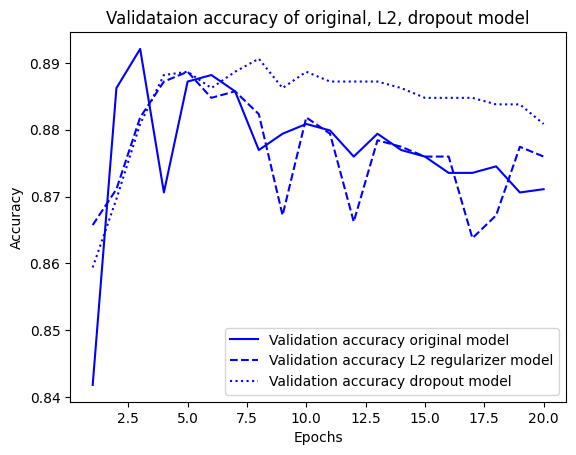

In [ ]:
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_acc_l2 = history_12_reg.history["val_accuracy"]
val_acc_dropout = history_dropout_reg.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy original model")
plt.plot(epochs, val_acc_l2, "b--",
         label="Validation accuracy L2 regularizer model")
plt.plot(epochs, val_acc_dropout, "b:",
         label="Validation accuracy dropout model")
plt.title("Validataion accuracy of original, L2, dropout model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

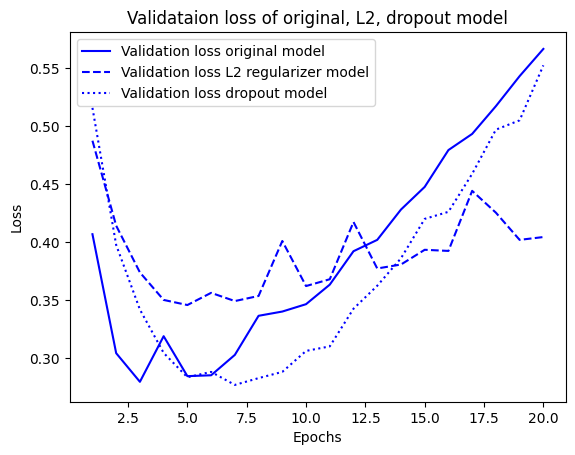

In [ ]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
val_loss_l2 = history_12_reg.history["val_loss"]
val_loss_dropout = history_dropout_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss original model")
plt.plot(epochs, val_loss_l2, "b--",
         label="Validation loss L2 regularizer model")
plt.plot(epochs, val_loss_dropout, "b:",
         label="Validation loss dropout model")
plt.title("Validataion loss of original, L2, dropout model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 뉴스 기사 분류: 다중 분류 문제

### 로이터 데이터셋

**로이터 데이터셋 로드하기**

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


### 데이터 준비

**데이터 인코딩하기**

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**레이블 인코딩하기**

In [4]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 모델 구성

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split = 0.4)

Epoch 1/20
11/11 [==============================] - 2s 143ms/step - loss: 3.0775 - accuracy: 0.4515 - val_loss: 2.1975 - val_accuracy: 0.5842
Epoch 2/20
11/11 [==============================] - 1s 74ms/step - loss: 1.8863 - accuracy: 0.6133 - val_loss: 1.6227 - val_accuracy: 0.6660
Epoch 3/20
11/11 [==============================] - 1s 76ms/step - loss: 1.4371 - accuracy: 0.6940 - val_loss: 1.3831 - val_accuracy: 0.7022
Epoch 4/20
11/11 [==============================] - 1s 78ms/step - loss: 1.1950 - accuracy: 0.7436 - val_loss: 1.2512 - val_accuracy: 0.7259
Epoch 5/20
11/11 [==============================] - 1s 134ms/step - loss: 1.0157 - accuracy: 0.7842 - val_loss: 1.1568 - val_accuracy: 0.7501
Epoch 6/20
11/11 [==============================] - 2s 148ms/step - loss: 0.8651 - accuracy: 0.8193 - val_loss: 1.1031 - val_accuracy: 0.7576
Epoch 7/20
11/11 [==============================] - 1s 120ms/step - loss: 0.7379 - accuracy: 0.8434 - val_loss: 1.0398 - val_accuracy: 0.7707
Epoch 8/2

**L2 가중치규제**

In [8]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history_12 = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
11/11 [==============================] - 2s 121ms/step - loss: 3.3715 - accuracy: 0.4279 - val_loss: 2.4738 - val_accuracy: 0.6062
Epoch 2/20
11/11 [==============================] - 1s 74ms/step - loss: 2.1655 - accuracy: 0.6359 - val_loss: 1.8961 - val_accuracy: 0.6707
Epoch 3/20
11/11 [==============================] - 1s 76ms/step - loss: 1.7089 - accuracy: 0.6936 - val_loss: 1.6659 - val_accuracy: 0.7000
Epoch 4/20
11/11 [==============================] - 1s 76ms/step - loss: 1.4772 - accuracy: 0.7441 - val_loss: 1.5365 - val_accuracy: 0.7359
Epoch 5/20
11/11 [==============================] - 1s 126ms/step - loss: 1.3090 - accuracy: 0.7890 - val_loss: 1.4456 - val_accuracy: 0.7540
Epoch 6/20
11/11 [==============================] - 1s 74ms/step - loss: 1.1870 - accuracy: 0.8167 - val_loss: 1.4198 - val_accuracy: 0.7551
Epoch 7/20
11/11 [==============================] - 1s 78ms/step - loss: 1.0919 - accuracy: 0.8397 - val_loss: 1.3497 - val_accuracy: 0.7712
Epoch 8/20


**dropout**

In [9]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
11/11 [==============================] - 3s 150ms/step - loss: 3.5093 - accuracy: 0.2217 - val_loss: 2.8030 - val_accuracy: 0.5341
Epoch 2/20
11/11 [==============================] - 1s 108ms/step - loss: 2.6468 - accuracy: 0.4563 - val_loss: 2.0378 - val_accuracy: 0.5603
Epoch 3/20
11/11 [==============================] - 1s 103ms/step - loss: 2.1292 - accuracy: 0.5264 - val_loss: 1.7088 - val_accuracy: 0.6145
Epoch 4/20
11/11 [==============================] - 1s 79ms/step - loss: 1.8693 - accuracy: 0.5636 - val_loss: 1.5337 - val_accuracy: 0.6507
Epoch 5/20
11/11 [==============================] - 1s 117ms/step - loss: 1.6817 - accuracy: 0.5994 - val_loss: 1.4383 - val_accuracy: 0.6766
Epoch 6/20
11/11 [==============================] - 1s 113ms/step - loss: 1.5623 - accuracy: 0.6244 - val_loss: 1.3622 - val_accuracy: 0.6944
Epoch 7/20
11/11 [==============================] - 1s 78ms/step - loss: 1.4705 - accuracy: 0.6465 - val_loss: 1.3029 - val_accuracy: 0.6969
Epoch 8/

**훈련과 검증 손실 그리기**

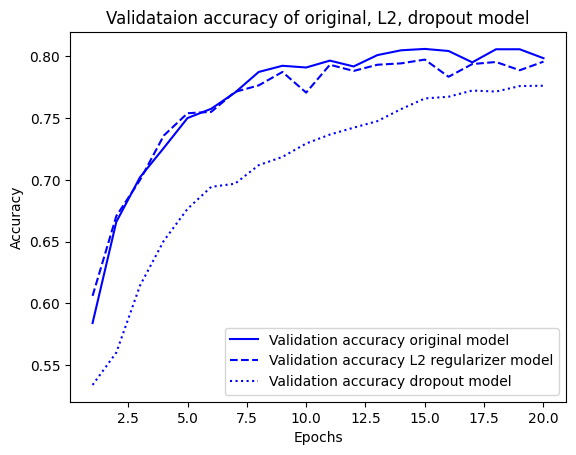

In [10]:
import matplotlib.pyplot as plt
val_acc = history.history["val_accuracy"]
val_acc_l2 = history_12.history["val_accuracy"]
val_acc_dropout = history_dropout.history["val_accuracy"]
epochs = range(1, 21)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy original model")
plt.plot(epochs, val_acc_l2, "b--",
         label="Validation accuracy L2 regularizer model")
plt.plot(epochs, val_acc_dropout, "b:",
         label="Validation accuracy dropout model")
plt.title("Validataion accuracy of original, L2, dropout model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

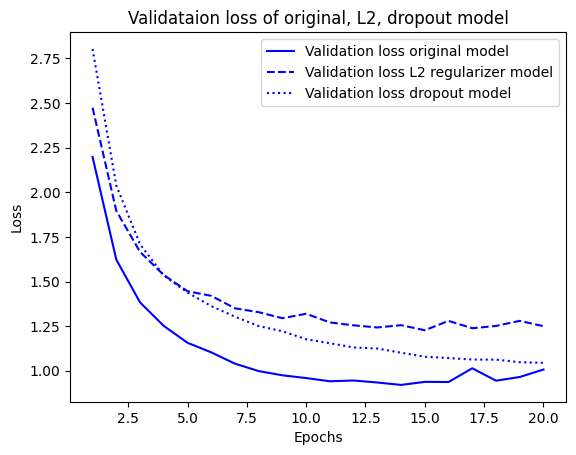

In [11]:
import matplotlib.pyplot as plt
val_loss = history.history["val_loss"]
val_loss_l2 = history_12.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss original model")
plt.plot(epochs, val_loss_l2, "b--",
         label="Validation loss L2 regularizer model")
plt.plot(epochs, val_loss_dropout, "b:",
         label="Validation loss dropout model")
plt.title("Validataion loss of original, L2, dropout model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

##epoch 늘려보기(40)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_split = 0.4)

Epoch 1/40
11/11 [==============================] - 2s 123ms/step - loss: 3.0688 - accuracy: 0.3904 - val_loss: 2.2406 - val_accuracy: 0.5277
Epoch 2/40
11/11 [==============================] - 1s 119ms/step - loss: 1.9341 - accuracy: 0.5932 - val_loss: 1.6648 - val_accuracy: 0.6535
Epoch 3/40
11/11 [==============================] - 2s 169ms/step - loss: 1.4912 - accuracy: 0.6857 - val_loss: 1.4166 - val_accuracy: 0.7033
Epoch 4/40
11/11 [==============================] - 2s 141ms/step - loss: 1.2336 - accuracy: 0.7411 - val_loss: 1.2765 - val_accuracy: 0.7239
Epoch 5/40
11/11 [==============================] - 1s 78ms/step - loss: 1.0418 - accuracy: 0.7873 - val_loss: 1.1759 - val_accuracy: 0.7506
Epoch 6/40
11/11 [==============================] - 1s 64ms/step - loss: 0.8839 - accuracy: 0.8176 - val_loss: 1.1071 - val_accuracy: 0.7506
Epoch 7/40
11/11 [==============================] - 1s 60ms/step - loss: 0.7648 - accuracy: 0.8365 - val_loss: 1.0492 - val_accuracy: 0.7712
Epoch 8/4

In [13]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history_12 = model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/40
11/11 [==============================] - 2s 144ms/step - loss: 3.4780 - accuracy: 0.4559 - val_loss: 2.6280 - val_accuracy: 0.5900
Epoch 2/40
11/11 [==============================] - 1s 79ms/step - loss: 2.2961 - accuracy: 0.6203 - val_loss: 2.0030 - val_accuracy: 0.6652
Epoch 3/40
11/11 [==============================] - 1s 60ms/step - loss: 1.8160 - accuracy: 0.6838 - val_loss: 1.7262 - val_accuracy: 0.6925
Epoch 4/40
11/11 [==============================] - 1s 91ms/step - loss: 1.5456 - accuracy: 0.7237 - val_loss: 1.5664 - val_accuracy: 0.7156
Epoch 5/40
11/11 [==============================] - 1s 76ms/step - loss: 1.3647 - accuracy: 0.7636 - val_loss: 1.4685 - val_accuracy: 0.7364
Epoch 6/40
11/11 [==============================] - 2s 156ms/step - loss: 1.2279 - accuracy: 0.8033 - val_loss: 1.4084 - val_accuracy: 0.7618
Epoch 7/40
11/11 [==============================] - 1s 115ms/step - loss: 1.1232 - accuracy: 0.8274 - val_loss: 1.3616 - val_accuracy: 0.7634
Epoch 8/40

In [15]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(x_train,
                    y_train,
                    epochs=40,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/40
11/11 [==============================] - 2s 144ms/step - loss: 3.3239 - accuracy: 0.2566 - val_loss: 2.4927 - val_accuracy: 0.5252
Epoch 2/40
11/11 [==============================] - 1s 81ms/step - loss: 2.4440 - accuracy: 0.4663 - val_loss: 1.8988 - val_accuracy: 0.5906
Epoch 3/40
11/11 [==============================] - 1s 62ms/step - loss: 2.0151 - accuracy: 0.5294 - val_loss: 1.6358 - val_accuracy: 0.6599
Epoch 4/40
11/11 [==============================] - 1s 75ms/step - loss: 1.7713 - accuracy: 0.5797 - val_loss: 1.4755 - val_accuracy: 0.6788
Epoch 5/40
11/11 [==============================] - 1s 76ms/step - loss: 1.6079 - accuracy: 0.6244 - val_loss: 1.3786 - val_accuracy: 0.6925
Epoch 6/40
11/11 [==============================] - 1s 62ms/step - loss: 1.4788 - accuracy: 0.6450 - val_loss: 1.3062 - val_accuracy: 0.7044
Epoch 7/40
11/11 [==============================] - 1s 76ms/step - loss: 1.3988 - accuracy: 0.6660 - val_loss: 1.2551 - val_accuracy: 0.7072
Epoch 8/40
1

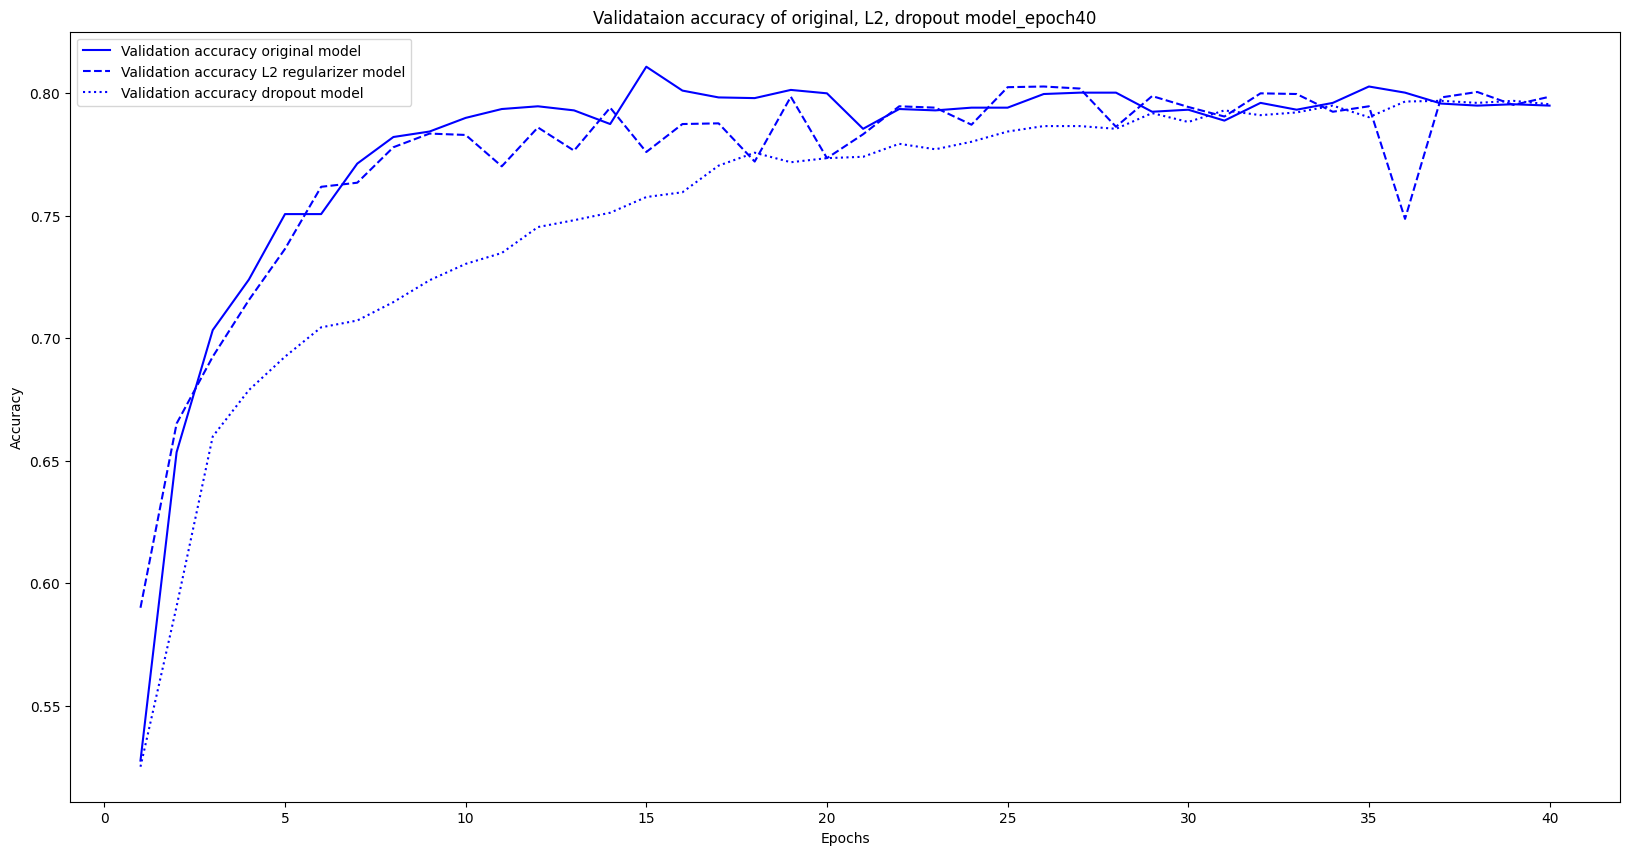

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
val_acc = history.history["val_accuracy"]
val_acc_l2 = history_12.history["val_accuracy"]
val_acc_dropout = history_dropout.history["val_accuracy"]
epochs = range(1, 41)
plt.plot(epochs, val_acc, "b-",
         label="Validation accuracy original model")
plt.plot(epochs, val_acc_l2, "b--",
         label="Validation accuracy L2 regularizer model")
plt.plot(epochs, val_acc_dropout, "b:",
         label="Validation accuracy dropout model")
plt.title("Validataion accuracy of original, L2, dropout model_epoch40")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

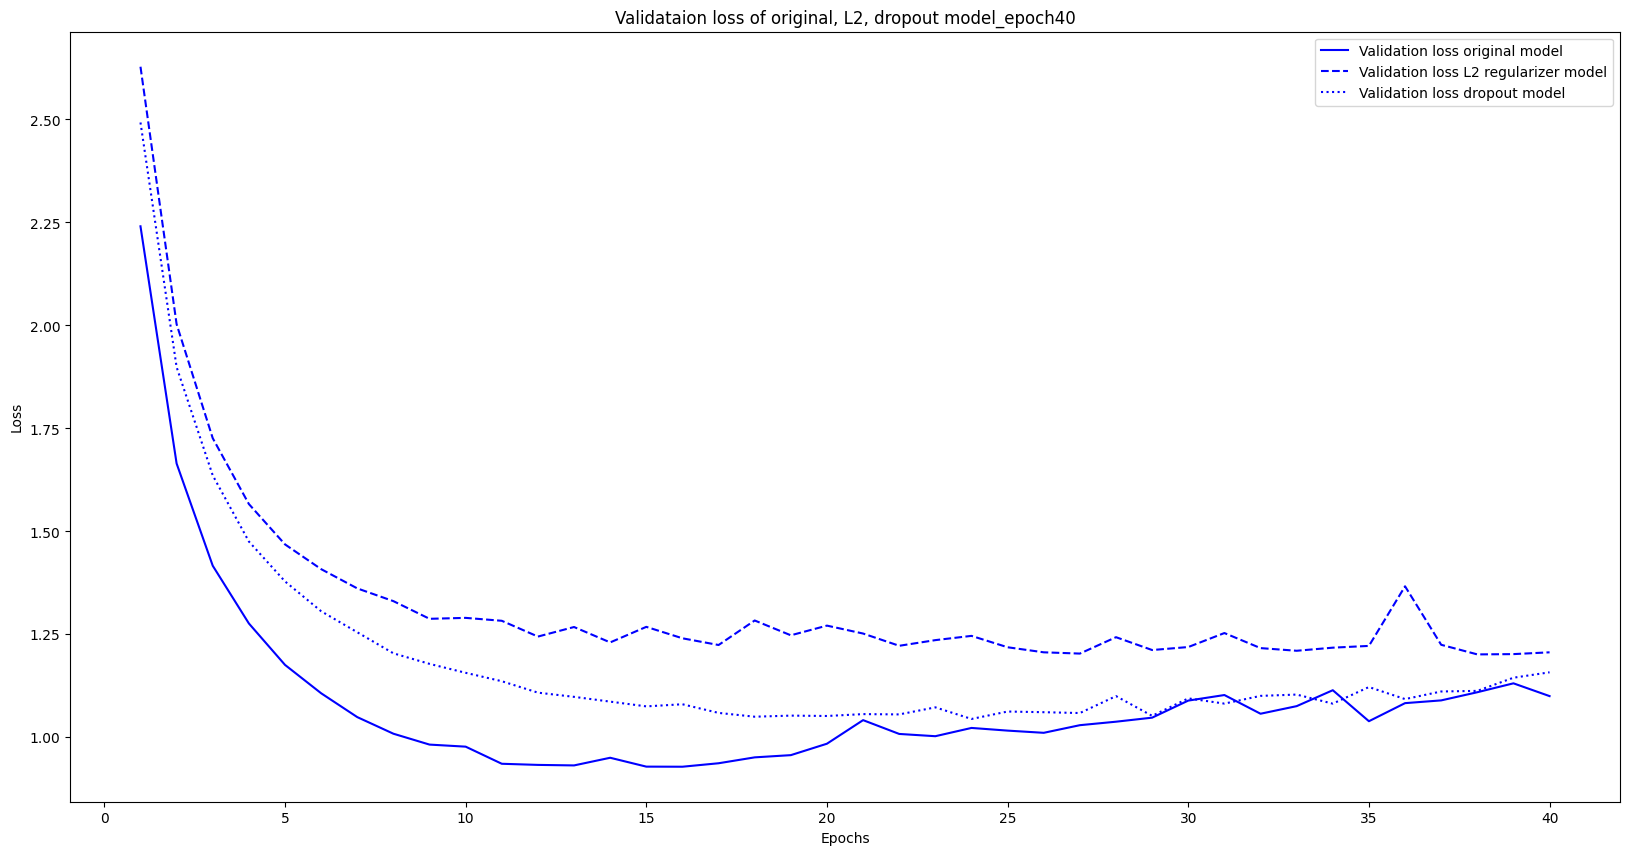

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
val_loss = history.history["val_loss"]
val_loss_l2 = history_12.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]
epochs = range(1, 41)
plt.plot(epochs, val_loss, "b-",
         label="Validation loss original model")
plt.plot(epochs, val_loss_l2, "b--",
         label="Validation loss L2 regularizer model")
plt.plot(epochs, val_loss_dropout, "b:",
         label="Validation loss dropout model")
plt.title("Validataion loss of original, L2, dropout model_epoch40")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()